In [390]:
import numpy as np
rng = np.random.default_rng(2025)
from itertools import product
from functools import partial
from math import ceil

import matplotlib.pyplot as plt
from scipy import signal

In [463]:
class Population:
    def __init__(self, rng, n_molecules, Ls: tuple):
        '''Li indicates the container length in the direction i'''

        # Random initial positions
        self.dimensions = len(Ls)
        self.lengths = np.array(Ls)

        self.r0s = np.stack([rng.uniform(0,L, n_molecules) for L in self.lengths]).T
        # self.Population = np.stack([Molecule(x,y,z) for x,y,z in self.r0s])
        self.rng = rng


    def diffuse(self, dt, D, timesteps):

        eff_D = D/np.sqrt(self.dimensions)
        sqdt = np.sqrt(dt)

        upper_boundary_matrix = np.tile(self.lengths, reps=(len(self.r0s), 1))
        lower_boundary_matrix = np.zeros_like(upper_boundary_matrix)
        
        increments = self.rng.normal(size=(timesteps, *self.r0s.shape))*eff_D*sqdt

        for inc in increments:

            # Add the diffusive increment
            self.r0s += inc

            # Reflect lower bounds
            self.r0s = np.where(
                self.r0s > lower_boundary_matrix,
                self.r0s,
                - self.r0s)

            # Reflect upper bounds
            self.r0s = np.where(
                self.r0s < upper_boundary_matrix,
                self.r0s,
                2*upper_boundary_matrix - self.r0s)

            # print(upper_boundary_matrix)
            # assert not (self.r0s<upper_boundary_matrix).all() 

        return self.r0s
            
        
def render_3d_image(population, Ls, resolution, kernel_function):

    # Ls = [population.r0s[:,i].max() for i in range(population.dimensions)]

    Xs = [np.arange(-L, L, resolution) for L in Ls]

    XXs = np.meshgrid(*Xs, indexing='ij')

    kernel = kernel_function(XXs)
    volume = np.zeros([ceil(L/resolution) for L in Ls])

    for molecule_position in population.r0s:
        index = [int(coordinate/resolution) for coordinate in molecule_position]

        volume[*index] += 1

    filtered = signal.convolve(volume, kernel, mode="same", method='auto')

    return filtered
    

def gaussian_kernel_function(meshes, sigma):
    return np.exp(-np.array([mesh**2 for mesh in meshes]).sum(axis=0)/2/sigma**2)

def fake_laguerre_kernel_function(meshes, sigma, omega):
    return np.exp(-np.array([mesh**2 for mesh in meshes]).sum(axis=0)/2/sigma**2) \
        * (1+np.cos(omega * np.sqrt(np.sum(mesh**2 for mesh in meshes))))




# 3D
Simulate
Now we have to render the image

/tmp/ipykernel_491409/1791237861.py:73: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  * (1+np.cos(omega * np.sqrt(np.sum(mesh**2 for mesh in meshes))))


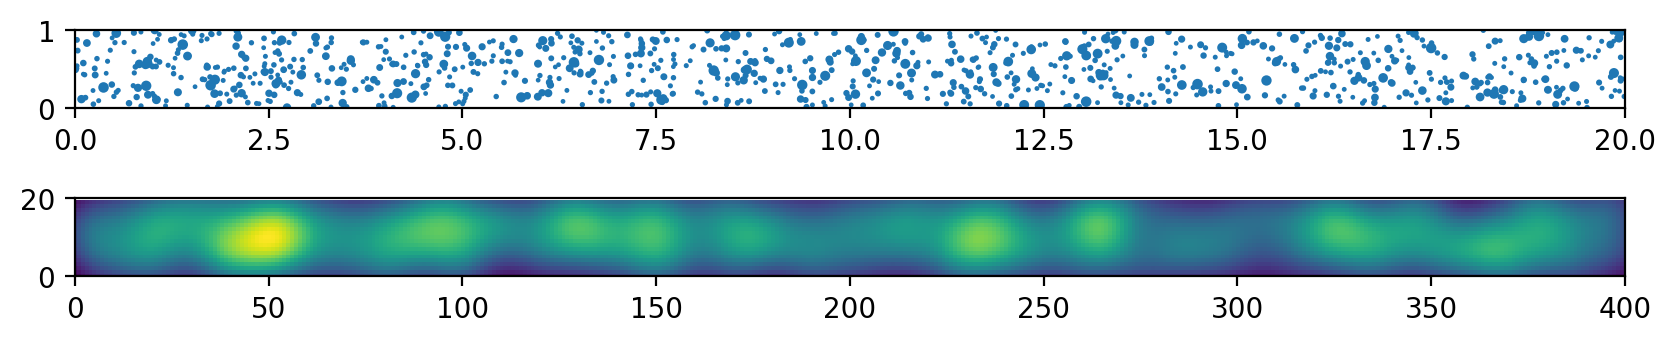

In [407]:
# Simulate 
rng = np.random.default_rng(2022)
Ls = (20,1,1)

population = Population(rng, n_molecules=1000, Ls=Ls)
_ = population.diffuse(dt=0.001, D=10, timesteps=3000)


# Render
resolution = 0.05
sigma = 0.3
omega = 1

kernel_function = partial(fake_laguerre_kernel_function, sigma=sigma, omega=omega)
volume = render_3d_image(population, Ls, resolution, kernel_function)

if len(volume.shape) == 3: image = volume.sum(axis=2) #sum over z stack
else: image = volume


# Plot
fig, axs = plt.subplots(2,1,figsize=(10,2), dpi=200)

ax = axs[0]
if len(volume.shape) == 3: ax.scatter(*population.r0s.T[:2], s=(5*np.atan(0.1/population.r0s.T[2])))
else: ax.scatter(*population.r0s.T, s=2)
ax.set_aspect('equal')

ax = axs[1]
ax.imshow(image.T)


x_lim = min(50, Ls[0])
pix_lim = x_lim/resolution

y_lim = min(np.inf, Ls[1])
piy_lim = y_lim/resolution

axs[0].set_xlim(0,x_lim);
axs[0].set_ylim(0,y_lim)

axs[1].set_xlim(0,pix_lim);
axs[1].set_ylim(0,piy_lim);

# 2D

/tmp/ipykernel_491409/1791237861.py:73: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  * (1+np.cos(omega * np.sqrt(np.sum(mesh**2 for mesh in meshes))))


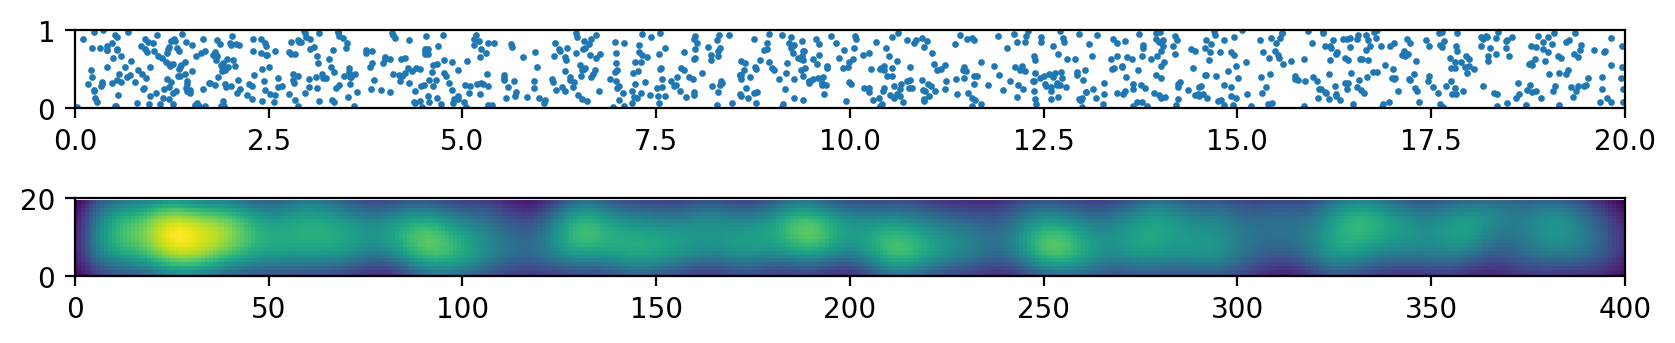

In [408]:
# Simulate 
rng = np.random.default_rng(2022)
Ls = (20,1)

population = Population(rng, n_molecules=1000, Ls=Ls)
_ = population.diffuse(dt=0.001, D=10, timesteps=3000)


# Render
resolution = 0.05
sigma = 0.3
omega = 1

kernel_function = partial(fake_laguerre_kernel_function, sigma=sigma, omega=omega)
volume = render_3d_image(population, Ls, resolution, kernel_function)

if len(volume.shape) == 3: image = volume.sum(axis=2) #sum over z stack
else: image = volume


# Plot
fig, axs = plt.subplots(2,1,figsize=(10,2), dpi=200)

ax = axs[0]
if len(volume.shape) == 3: ax.scatter(*population.r0s.T[:2], s=(5*np.atan(0.1/population.r0s.T[2])))
else: ax.scatter(*population.r0s.T, s=2)
ax.set_aspect('equal')

ax = axs[1]
ax.imshow(image.T)


x_lim = min(50, Ls[0])
pix_lim = x_lim/resolution

y_lim = min(np.inf, Ls[1])
piy_lim = y_lim/resolution

axs[0].set_xlim(0,x_lim);
axs[0].set_ylim(0,y_lim)

axs[1].set_xlim(0,pix_lim);
axs[1].set_ylim(0,piy_lim);

Comparison between different beams in 3d

/tmp/ipykernel_491409/1791237861.py:73: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  * (1+np.cos(omega * np.sqrt(np.sum(mesh**2 for mesh in meshes))))


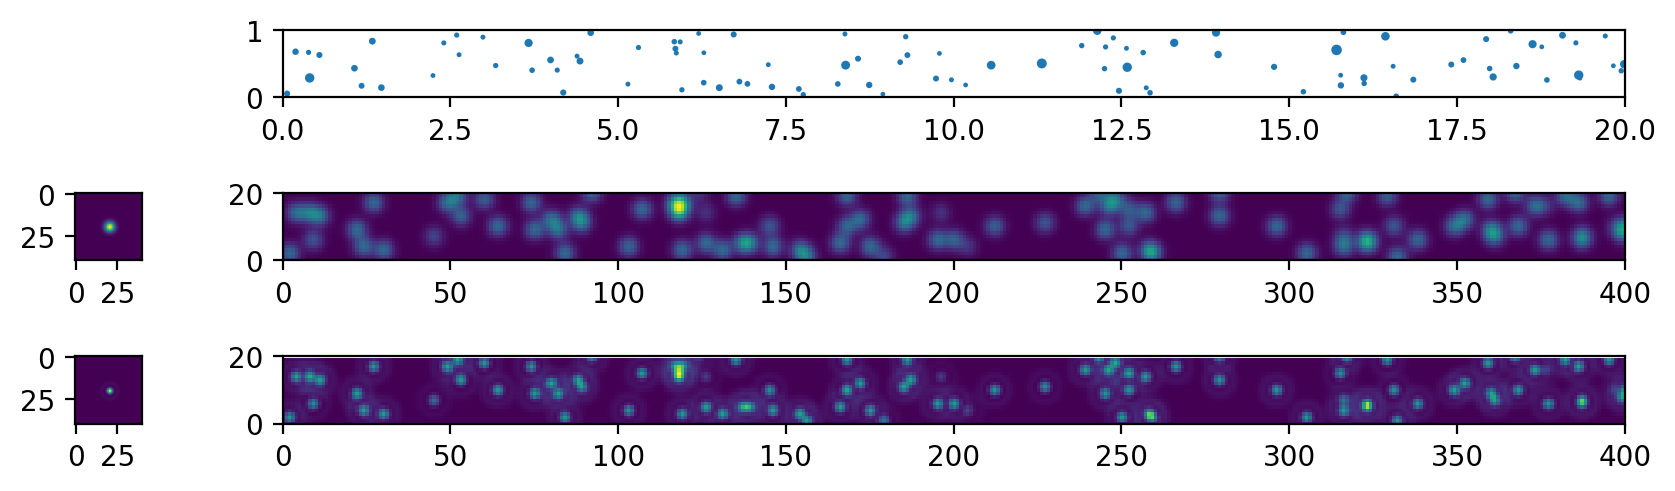

In [465]:
# Simulate 
rng = np.random.default_rng(2022)
Ls = (20,1,1)

population = Population(rng, n_molecules=100, Ls=Ls)
_ = population.diffuse(dt=0.001, D=10, timesteps=3000)


# Render
resolution = 0.05
sigma = 0.1
omega = 20

gk = partial(gaussian_kernel_function, sigma=sigma)
lk = partial(fake_laguerre_kernel_function, sigma=sigma, omega=omega)


gaussian_volume = render_3d_image(population, Ls, resolution, kernel_function=gk)
fake_laguerre_volume = render_3d_image(population, Ls, resolution, kernel_function=lk)

gaussian_image = gaussian_volume.sum(axis=2) #sum over z stack
fake_laguerre_image = fake_laguerre_volume.sum(axis=2) #sum over z stack


# 2d visualization of the kernel
X = np.arange(-Ls[1], Ls[1], resolution)
Y = X

XX, YY = np.meshgrid(X, Y)
gaussian_filter = gk((XX,YY))
fake_laguerre_filter = lk((XX,YY))

# Plot
fig, axs = plt.subplots(3,2, width_ratios=(1,20,), figsize=(10,3), dpi=200)


ax = axs[0,1]
ax.scatter(*population.r0s.T[:2], s=(5*np.atan(0.1/population.r0s.T[2])))

ax = axs[1,0]
ax.imshow(gaussian_filter)

ax = axs[1,1]
ax.imshow(gaussian_image.T)

ax = axs[2,0]
ax.imshow(fake_laguerre_filter)


ax = axs[2,1]
ax.imshow(fake_laguerre_image.T)


x_lim = min(50, Ls[0])
pix_lim = x_lim/resolution

y_lim = min(np.inf, Ls[1])
piy_lim = y_lim/resolution


axs[0,1].set_xlim(0,x_lim)
axs[0,1].set_ylim(0,y_lim)

for ax in axs[1:,1]:
    ax.set_xlim(0,pix_lim);
    ax.set_ylim(0,piy_lim);

for ax in axs.flatten(): ax.set_aspect('equal')

axs[0,0].remove()